<a href="https://colab.research.google.com/github/peteray-dev/Fraud_Detection_Transactions/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle datasets download orogunadebola/credit-card-transaction-dataset-fraud-detection


Dataset URL: https://www.kaggle.com/datasets/orogunadebola/credit-card-transaction-dataset-fraud-detection
License(s): unknown
100% 1.48G/1.48G [01:04<00:00, 32.2MB/s]
100% 1.48G/1.48G [01:04<00:00, 24.6MB/s]


In [3]:
! mkdir fraud_detection
! unzip /content/credit-card-transaction-dataset-fraud-detection.zip -d fraud_detection

Archive:  /content/credit-card-transaction-dataset-fraud-detection.zip
  inflating: fraud_detection/data.csv  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('/content/fraud_detection/data.csv')

In [6]:
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,customer_avg_amout_1_day,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day
0,024-79-2449,30417925130692,Felicia,Gomez,F,486 Benson Stravenue,Rockford,IL,61107,42.2786,...,4.01,18.27,6.97,4824.23,73065.81,141799.95,4,13,20,14
1,269-54-1394,4224979584238239,Jeffrey,Mathews,M,5430 Leslie Flat Suite 854,Ceres,CA,95307,37.5833,...,88.83,77.27,8.06,3243.55,51496.77,1093950.50,3,10,11,28
2,527-16-1817,4056555304074394,Christina,Ellis,F,75933 Harvey Via Apt. 423,Buffalo,NY,14224,42.8371,...,66.96,67.47,43.41,4242.22,26384.49,1005859.33,6,14,23,48
3,314-98-4472,6011544296258081,Steven,Murphy,M,268 Anderson Valley Apt. 958,Mansfield Center,CT,6250,41.7698,...,15.32,58.22,52.05,4303.16,3476.36,226662.34,3,11,14,14
4,390-83-9961,374917808855764,Cynthia,Martinez,F,53164 Deborah Square Apt. 739,Anaheim,CA,92804,33.8186,...,28.81,44.64,24.65,2424.13,32215.14,36989.60,2,13,16,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580255 entries, 0 to 8580254
Data columns (total 44 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ssn                         object 
 1   cc_num                      int64  
 2   first                       object 
 3   last                        object 
 4   gender                      object 
 5   street                      object 
 6   city                        object 
 7   state                       object 
 8   zip                         int64  
 9   lat                         float64
 10  long                        float64
 11  city_pop                    int64  
 12  job                         object 
 13  dob                         object 
 14  acct_num                    int64  
 15  profile                     object 
 16  trans_num                   object 
 17  trans_date                  object 
 18  trans_time                  object 
 19  unix_time            

In [8]:
df.head(1).transpose()

,0
ssn,024-79-2449
cc_num,30417925130692
first,Felicia
last,Gomez
gender,F
street,486 Benson Stravenue
city,Rockford
state,IL
zip,61107
lat,42.2786


In [9]:
df.isnull().sum()

,0
ssn,0
cc_num,0
first,0
last,0
gender,0
street,0
city,0
state,0
zip,0
lat,0


In [10]:
for i in df.columns:
  print(i, df[i].nunique())

ssn 9968
cc_num 9968
first 663
last 986
gender 2
street 9968
city 3694
state 51
zip 6822
lat 6676
long 6743
city_pop 4356
job 639
dob 8188
acct_num 9968
profile 12
trans_num 8580255
trans_date 366
trans_time 86400
unix_time 6699491
category 14
amt 119685
is_fraud 2
merchant 693
merch_lat 6756782
merch_long 7695067
customer_num_trans_1_day 7
customer_num_trans_7_day 12
customer_num_trans_30_day 17
trans_time_secs 86399
trans_time_hrs 24
trans_time_is_night 2
trans_time_day 7
trans_date_is_weekend 2
customer_avg_amout_1_day 8901
customer_avg_amount_7_day 8901
customer_avg_amount_30_day 6901
merchant_num_trans_1_day 490001
merchant_num_trans_7_day 5739184
merchant_num_trans_30_day 8250846
merchant_risk_1_day 8
merchant_risk_7_day 16
merchant_risk_30_day 24
merchant_risk_90_day 51


In [11]:
# Im dropping this because they arent useful for analysis based on domain knowledge,
# ~the trans hr and sencond will be dropped becasue the time are different fro the real transaction time this may be because of the time zones where the transacion happens
# and the timestamp of the server, instead i will use the unix time stamp for analysis
df.drop(columns=['first','profile','ssn', 'cc_num','acct_num', 'merch_lat', 'merch_long', 'zip', 'street','trans_time_secs', 'trans_time_hrs' ,'last'],  inplace=True)

In [12]:
df['dob'] = pd.to_datetime(df['dob'])
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [13]:
# get the age out of dob
import datetime

def calculate_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['dob'].apply(calculate_age)

In [14]:
df.drop(columns='dob', inplace=True)

In [15]:
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns

print(f"numerical columns: {num_col}")
print(f"categorical columns: {cat_col}")

numerical columns: Index(['lat', 'long', 'city_pop', 'unix_time', 'amt', 'is_fraud',
       'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day', 'trans_time_is_night', 'trans_time_day',
       'trans_date_is_weekend', 'customer_avg_amout_1_day',
       'customer_avg_amount_7_day', 'customer_avg_amount_30_day',
       'merchant_num_trans_1_day', 'merchant_num_trans_7_day',
       'merchant_num_trans_30_day', 'merchant_risk_1_day',
       'merchant_risk_7_day', 'merchant_risk_30_day', 'merchant_risk_90_day',
       'age'],
      dtype='object')
categorical columns: Index(['gender', 'city', 'state', 'job', 'trans_num', 'trans_date',
       'trans_time', 'category', 'merchant'],
      dtype='object')


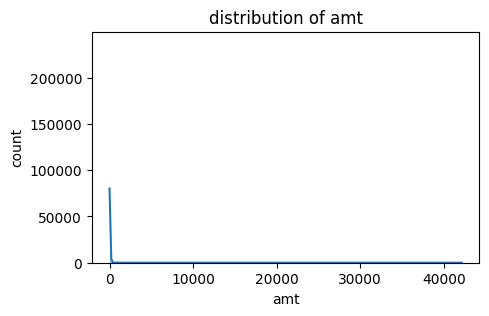

In [ ]:
def plot_hist(df, num_col):
  for col in num_col:
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.histplot(data=df, x=col, ax=ax, kde=True)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
numb = ['amt', 'city_pop', 'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day', 'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day',
       'merchant_risk_90_day', 'age']

plot_hist(df, numb)


In [ ]:
np.number

In [ ]:


def univariate_analysis(df, cols):
    for col in cols:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.boxplot(x=df[col], ax=ax)  # Fixed axis input (x=col)
        plt.title(f'{col} Boxplot')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

# List of numeric columns to analyze
numb = ['amt', 'city_pop', 'customer_num_trans_1_day', 'customer_num_trans_7_day',
        'customer_num_trans_30_day', 'merchant_risk_1_day', 'merchant_risk_7_day',
        'merchant_risk_30_day', 'merchant_risk_90_day', 'age']

# Call the function
univariate_analysis(df, numb)


In [ ]:
# i might not be removing outliers as seen in the amount, since this is afraud detection system
# fraudsters might want to access such huge amount of money

In [ ]:
# Display correlation matrix for numerical columns
correlation_matrix = df[num_col].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [ ]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(18, 6))

    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                               startangle=90, explode=[0.05] * value_counts.nunique())

        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['gender','state','category']
plot_categorical_distributions(columns_to_plot)

In [ ]:
df.groupby('merchant')['is_fraud'].value_counts().sort_index()


In [ ]:
df.groupby('merchant')['is_fraud'].sum().sort_values(ascending=False)
# the top targetted merchant for fraud attacks

In [ ]:
df.groupby('category')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).plot(kind='bar', stacked=True)
# understanding which category the fraud is coming more from

In [ ]:
def plot_top_categories_pie_charts(columns, data=df, palette='muted'):
    plt.figure(figsize=(len(columns) * 6, 6))

    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)

        # Get the top 10 categories based on frequency
        top_categories = data[column_name].value_counts().nlargest(10)

        # Plot the pie chart
        top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                                 startangle=90, explode=[0.05] * len(top_categories))

        plt.title(f'Top 10 {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['category', 'merchant']
plot_top_categories_pie_charts(columns_to_plot)

Insight: from the top 10 merchant, the fraudster attach the 2 of the top merchant, fraud_kilback_LLC and fraud_boyer_PLC, showing the fraudster sometime atttak the top merchants more.

grocery_pos has more fraudulent attach and being that it is one of the most spots where transactions were made

In [ ]:
df.groupby('city')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='bar', stacked=True)

fraud cases comes more from Houston, brooklyn and chicago, cities likeNavoo, essex junction has no cases

In [ ]:
df.groupby('state')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='bar', stacked=True)

Californian, Texas and Fl, are the top 3 states where the fradulent transaction come from

In [ ]:
high_value_threshold = df['amt'].quantile(0.97)
high_value_transactions = df[df['amt'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
# Adding TransactionType as hue for high-value transactions
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='amt', bins=30, kde=True, hue='category', palette='muted')
plt.title('Distribution of High-Value Transactions (Top 5%) by TransactionType')
plt.xlabel('Transaction Amount')
plt.show()

In [ ]:
df['unix_time'].value_counts().sort_values(ascending=False).head(5)

In [ ]:
df[df['unix_time'] == 1670616664]

In [ ]:
df.groupby('age')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='bar')

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=range(0, 101, 10), labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# Group by age group and count fraud occurrences
age_fraud_counts = df.groupby('age_group')['is_fraud'].value_counts().unstack().fillna(0)

# Sort by fraud occurrences (1) in descending order and plot the top 10
age_fraud_counts.sort_values(by=1, ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(10, 6))

# Plot enhancements
plt.title('Top 10 Age Groups with Highest Fraud Cases')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.legend(['Non-Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[df['age']>70].value_counts()

### KMeans Clustering

customer activity patterns and spending behaviour

In [ ]:
# feat = ['customer_num_trans_1_day',
#        'customer_num_trans_7_day', 'customer_num_trans_30_day',
#        'customer_avg_amout_1_day', 'customer_avg_amount_7_day',
#        'customer_avg_amount_30_day', 'merchant_num_trans_1_day']

feat = ['lat', 'long']

In [ ]:
# Take a 10% sample of the dataset for analysis
df_sample = df.sample(frac=0.1, random_state=42)  # 10% of 8.5M rows = 850,000 rows


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample[feat])


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [ ]:
optimal_k = 2  # Example value, adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(df_scaled)

In [ ]:
# Fit K-means with the chosen number of clusters (k=2)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_scaled)

# Assign clusters and calculate distance to cluster centroid
df_sample['Cluster'] = kmeans.labels_
df_sample['DistanceToCentroid'] = np.linalg.norm(df_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = df_sample['DistanceToCentroid'].quantile(0.95)
potential_frauds = df_sample[df_sample['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting clusters
scatter = plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Cluster Points')

# Plotting cluster centroids
centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Plotting potential frauds
# Get the indices of potential frauds within df_sample
fraud_indices_in_df_sample = potential_frauds.index.get_indexer(potential_frauds.index)

#Filter df_scaled using fraud_indices_in_df_sample
frauds = plt.scatter(df_scaled[fraud_indices_in_df_sample, 0], df_scaled[fraud_indices_in_df_sample, 1], c='black', label='Potential Frauds', edgecolors='k')


plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.title('K-means Clustering and Potential Frauds')
plt.legend(loc='upper right')
plt.show()

In [ ]:
df.head()